In [5]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import argparse
import matplotlib.pyplot as plt
import numpy as np
import pickle
import types

args = types.SimpleNamespace()
args.outpath_ee='/home/ubuntu/mol2qpu/output/EE_results/'
args.outpath_vqe='/home/ubuntu/mol2qpu/output/VQE_results/'
args.molecule = 'H2'
args.num_shots = 1000
basis_sets = ['sto3g', '321g']
d_string = '0pt5'
EE_results = np.empty(shape=len(basis_sets), dtype=object)
optimizers = ['COBYLA', 'L_BFGS_B', 'SPSA']
eigvecs = np.empty(shape=[len(basis_sets), len(optimizers)], dtype=object)
VQE_results = np.empty(shape=[len(basis_sets), len(optimizers)], dtype=object)
VQE_counts = np.empty(shape=[len(basis_sets), len(optimizers)], dtype=object)
VQE_evals = np.empty(shape=[len(basis_sets), len(optimizers)], dtype=object)

In [6]:
for i in range(len(basis_sets)):
    print("i ==== ", i)
    filename_ee = args.outpath_ee \
                + 'H2/'  \
                + basis_sets[i] + '_' \
                + d_string + '.pkl' 
    EE_results[i] = pickle.load(open(filename_ee,'rb'))    
    print(filename_ee)
    
    for j in range(len(optimizers)):
        print("j ==== ", j)
        filename_vqe = args.outpath_vqe \
                     + 'H2/'  \
                     + optimizers[j]  + '/' \
                     + 'VQE_' \
                     + basis_sets[i] + '_' \
                     + d_string + '_' \
                     + 'RY_lin_bk_'  \
                     + str(args.num_shots) + '.pkl'
        
        VQE_results[i][j] = pickle.load(open(filename_vqe, 'rb'))
        eigvecs[i][j] = VQE_results[i][j]["min_vector"]
        
        filename_counts = args.outpath_vqe \
                            + 'H2/'  \
                            + optimizers[j]  + '/' \
                            + 'CNTS_' \
                            + basis_sets[i] + '_' \
                            + d_string + '_' \
                            + 'RY_lin_bk_'  \
                            + str(args.num_shots) + '.pkl'
        VQE_counts[i][j] = pickle.load(open(filename_counts,'rb'))
        
        filename_vals = args.outpath_vqe \
                            + 'H2/'  \
                            + optimizers[j]  + '/' \
                            + 'VALS_' \
                            + basis_sets[i] + '_' \
                            + d_string + '_' \
                            + 'RY_lin_bk_'  \
                            + str(args.num_shots) + '.pkl'
        VQE_evals[i][j] = pickle.load(open(filename_vals,'rb'))

        print(filename_vqe)
        print(filename_counts)
        print(filename_vals)
        


i ====  0
/home/ubuntu/mol2qpu/output/EE_results/H2/sto3g_0pt5.pkl
j ====  0
/home/ubuntu/mol2qpu/output/VQE_results/H2/COBYLA/VQE_sto3g_0pt5_RY_lin_bk_1000.pkl
/home/ubuntu/mol2qpu/output/VQE_results/H2/COBYLA/CNTS_sto3g_0pt5_RY_lin_bk_1000.pkl
/home/ubuntu/mol2qpu/output/VQE_results/H2/COBYLA/VALS_sto3g_0pt5_RY_lin_bk_1000.pkl
j ====  1
/home/ubuntu/mol2qpu/output/VQE_results/H2/L_BFGS_B/VQE_sto3g_0pt5_RY_lin_bk_1000.pkl
/home/ubuntu/mol2qpu/output/VQE_results/H2/L_BFGS_B/CNTS_sto3g_0pt5_RY_lin_bk_1000.pkl
/home/ubuntu/mol2qpu/output/VQE_results/H2/L_BFGS_B/VALS_sto3g_0pt5_RY_lin_bk_1000.pkl
j ====  2
/home/ubuntu/mol2qpu/output/VQE_results/H2/SPSA/VQE_sto3g_0pt5_RY_lin_bk_1000.pkl
/home/ubuntu/mol2qpu/output/VQE_results/H2/SPSA/CNTS_sto3g_0pt5_RY_lin_bk_1000.pkl
/home/ubuntu/mol2qpu/output/VQE_results/H2/SPSA/VALS_sto3g_0pt5_RY_lin_bk_1000.pkl
i ====  1
/home/ubuntu/mol2qpu/output/EE_results/H2/321g_0pt5.pkl
j ====  0
/home/ubuntu/mol2qpu/output/VQE_results/H2/COBYLA/VQE_321g_0pt5_R

Exact Result for STO3G =  -2.113514216310622
Exact Result for 321G =  -2.1295678571917978


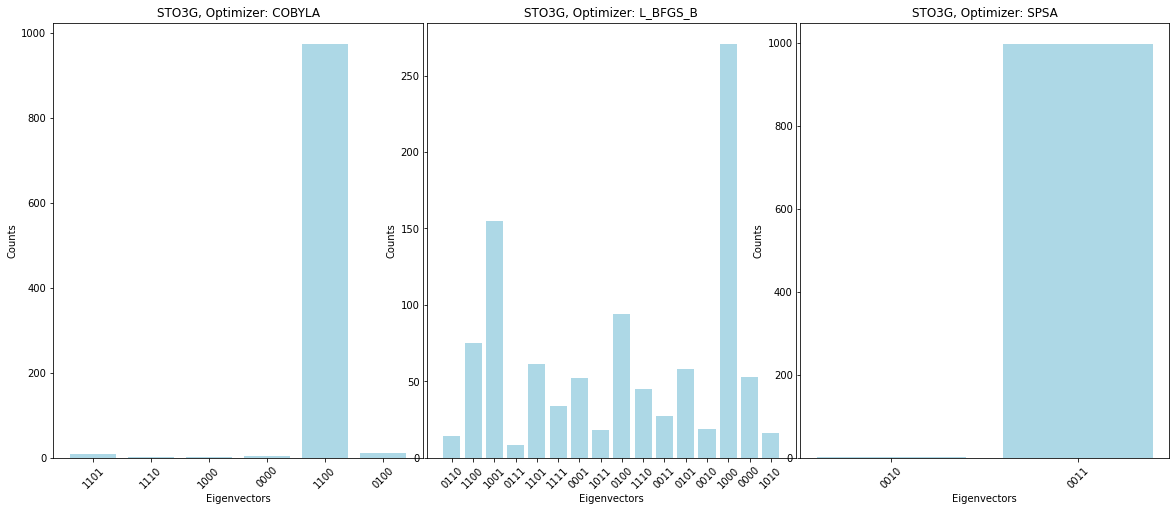

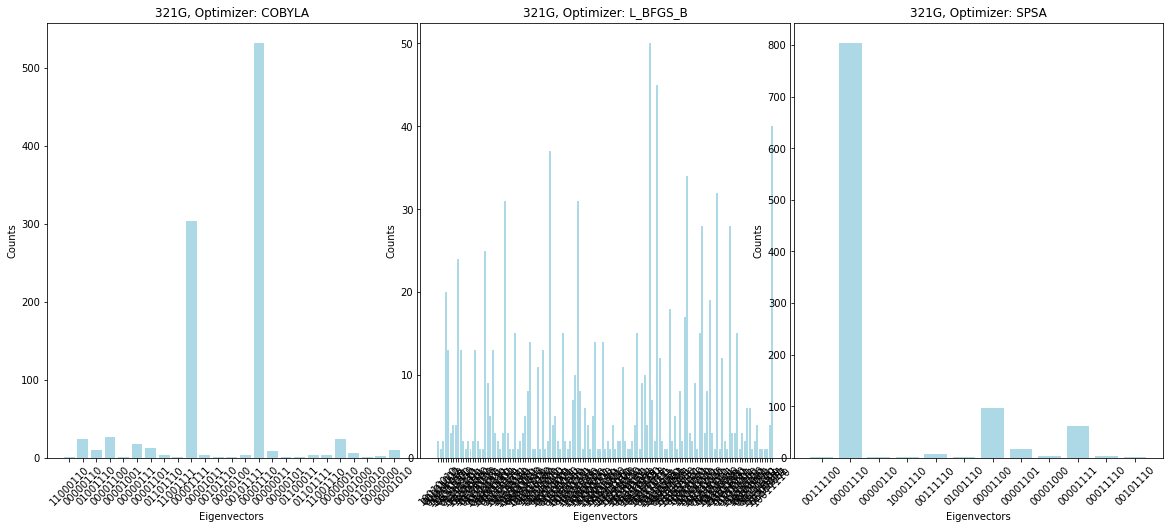

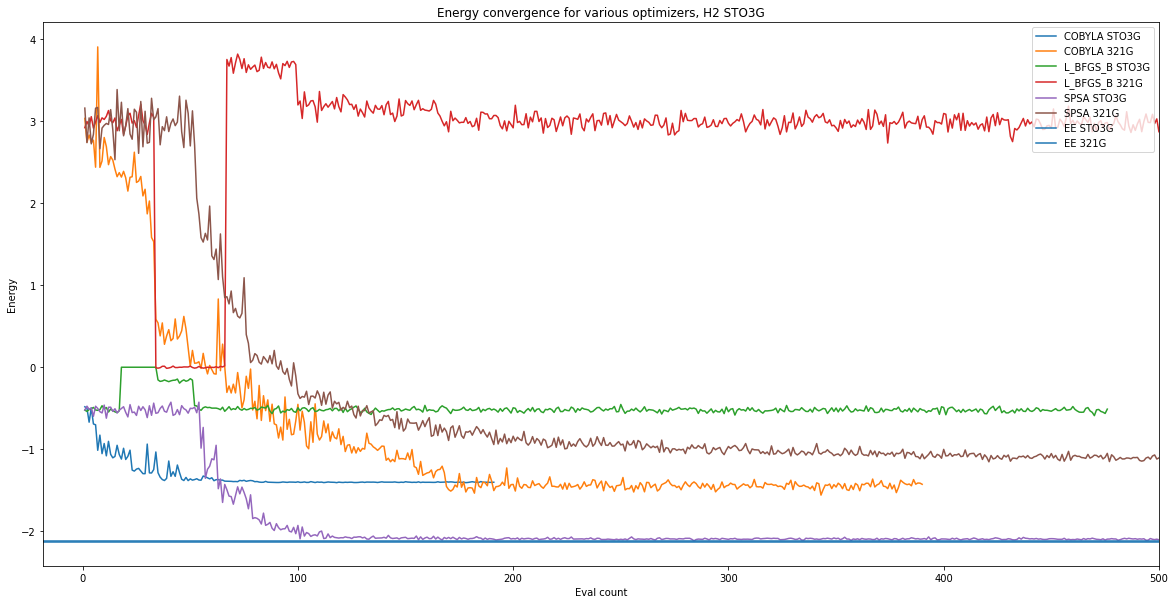

In [19]:
fig, axs = plt.subplots(1,3, figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1.5, wspace=.01)
axs = axs.ravel()

## STO3G
for i in range(len(optimizers)):
    pltobj = axs[i].bar(eigvecs[0][i].keys(), eigvecs[0][i].values(), color='lightblue')
    pltobj = axs[i].tick_params('x', labelrotation=45)
    pltobj = axs[i].set_xlabel('Eigenvectors')
    pltobj = axs[i].set_ylabel('Counts')
    pltobj = axs[i].set_title('STO3G, Optimizer: {}'.format(optimizers[i]))

fig, axs = plt.subplots(1,3, figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1.5, wspace=.01)
axs = axs.ravel()
## 321G  
for i in range(len(optimizers)):
    pltobj = axs[i].bar(eigvecs[1][i].keys(), eigvecs[1][i].values(), color='lightblue')
    pltobj = axs[i].tick_params('x', labelrotation=45)
    pltobj = axs[i].set_xlabel('Eigenvectors')
    pltobj = axs[i].set_ylabel('Counts')
    pltobj = axs[i].set_title('321G, Optimizer: {}'.format(optimizers[i]))
    
plt.figure(figsize=(20,10));
for i in range(len(optimizers)):
    fig = plt.plot(VQE_counts[0][i], VQE_evals[0][i], label=(optimizers[i]+' STO3G') );
    fig = plt.plot(VQE_counts[1][i], VQE_evals[1][i], label=(optimizers[i]+' 321G') );
    #plt.axhline(y=0.5, color='r', linestyle='-')
    #fig = plt.plot(EE_results[0], label=basis_sets[0])
    #fig = plt.plot(EE_results[1], label=basis_sets[1])
    fig = plt.xlabel('Eval count');
    fig = plt.ylabel('Energy');
    fig = plt.xlim(right=500)
    fig = plt.title('Energy convergence for various optimizers, H2 STO3G');
    fig = plt.legend(loc='upper right');
fig = plt.axhline(y=EE_results[0], label='EE STO3G')
fig = plt.axhline(y=EE_results[1], label='EE 321G')
fig = plt.legend(loc='upper right');
print("Exact Result for STO3G = ", EE_results[0]);
print("Exact Result for 321G = ", EE_results[1]);